In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # 

In [3]:
df_test = pd.DataFrame({"b" : [4,5,6], "a" : [7,np.NaN, 9]}, index = [2,1,3])
print(df_test)

     a  b
2  7.0  4
1  NaN  5
3  9.0  6


In [6]:
pd.melt(df_test)

,variable,value
0,a,7
1,a,8
2,a,9
3,b,4
4,b,5
5,b,6


In [4]:
df_test.sort_index()

,a,b
1,8,5
2,7,4
3,9,6


In [5]:
df_test.reset_index()

,index,a,b
0,2,7,4
1,1,8,5
2,3,9,6


In [45]:
df_test[df_test.a <= 8]


,a,b
2,7.0,4


In [46]:
df_test[["a", "b"]]

,a,b
2,7.0,4
1,NaN,5
3,9.0,6


In [47]:
df_test.columns.isin(["a","c"]) # Columns' group membership

array([ True, False], dtype=bool)

In [53]:
df_test.isnull().any(axis = 1)

2    False
1     True
3    False
dtype: bool

In [54]:
df_test.isnull().all(axis = 1)

2    False
1    False
3    False
dtype: bool

In [65]:
df_test.sum(axis = 1)

2    11.0
1     5.0
3    15.0
dtype: float64

In [69]:
df_test.assign(Area = lambda df : df.a * df.b)

,a,b,Area
2,7.0,4,28.0
1,NaN,5,NaN
3,9.0,6,54.0


In [71]:
df_test['c'] = df_test.a * df_test.b
df_test

,a,b,c
2,7.0,4,28.0
1,NaN,5,NaN
3,9.0,6,54.0


In [91]:
pd.qcut(range(101), 4)

[[0, 25], [0, 25], [0, 25], [0, 25], [0, 25], ..., (75, 100], (75, 100], (75, 100], (75, 100], (75, 100]]
Length: 101
Categories (4, object): [[0, 25] < (25, 50] < (50, 75] < (75, 100]]

In [92]:
pd.qcut(range(101), 4, labels = False)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [96]:
df_test.groupby(by = 'a').max()

,b,c
a,,
7.0,4,28.0
9.0,6,54.0


In [66]:
df_test_2 = pd.DataFrame({"a" : [4,5,6], "b" : [7,np.NaN, 9]}, 
                         index = pd.MultiIndex.from_tuples([('d', 1),('d', 2),('e', 1)], names = ['n', 'v']))

In [123]:
df_test_2

a    b
n v        
d 1  4  7.0
  2  5  NaN
e 1  6  9.0

In [127]:
df_test_2.groupby(level = 0).max()

,a,b
v,,
1,6,9.0
2,5,NaN


In [128]:
df_test_2.groupby(level = 1).max()

,a,b
v,,
1,6,9.0
2,5,NaN


In [4]:
df_test.a.shift(1)

2    NaN
1    7.0
3    NaN
Name: a, dtype: float64

In [8]:
df_test

,a,b
2,7.0,4
1,NaN,5
3,9.0,6


In [15]:
df_test.cummin()

,a,b
2,7.0,4.0
1,NaN,4.0
3,7.0,4.0


In [26]:
df_test.groupby(by = 'a').max() # Take 'a' as a group name

,b
a,
7.0,4
9.0,6


In [28]:
df_test.groupby(by = 'a').cummax()

,b
2,4.0
1,NaN
3,6.0


In [36]:
df_test_3 = pd.DataFrame([[2,4,1,3],[-1,-2,1,0],[0,0,2,2],[3,6,2,5]])

In [37]:
df_test_3

,0,1,2,3
0,2,4,1,3
1,-1,-2,1,0
2,0,0,2,2
3,3,6,2,5


In [40]:
df_test_3.rank(axis = 1) # Not Matrix Rank, but categorical ranking

,0,1,2,3
0,2.0,4.0,1.0,3.0
1,2.0,1.0,4.0,3.0
2,1.5,1.5,3.5,3.5
3,2.0,4.0,1.0,3.0


In [42]:
df_test_3.rank(pct = True, axis = 1)

,0,1,2,3
0,0.500,1.000,0.250,0.750
1,0.500,0.250,1.000,0.750
2,0.375,0.375,0.875,0.875
3,0.500,1.000,0.250,0.750


In [46]:
df_test_3.cummax()

,0,1,2,3
0,2,4,1,3
1,2,4,1,3
2,2,4,2,3
3,3,6,2,5


In [44]:
df_test_3.expanding().max()

,0,1,2,3
0,2.0,4.0,1.0,3.0
1,2.0,4.0,1.0,3.0
2,2.0,4.0,2.0,3.0
3,3.0,6.0,2.0,5.0


In [47]:
df_test_3.rolling(2).max()

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,2.0,4.0,1.0,3.0
2,0.0,0.0,2.0,2.0
3,3.0,6.0,2.0,5.0


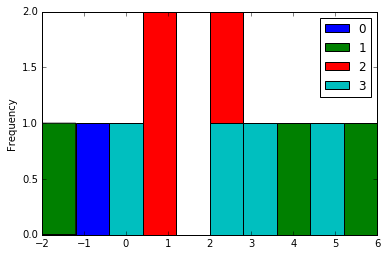

In [62]:
df_test_3.plot.hist()

In [73]:
df_test_4 = pd.DataFrame([['a',1],['b',2],['c',3]])
df_test_4

,0,1
0,a,1
1,b,2
2,c,3


In [74]:
df_test_5 = pd.DataFrame([['b',2],['c',3],['d',4]])
df_test_5

,0,1
0,b,2
1,c,3
2,d,4


In [77]:
pd.merge(df_test_4,df_test_5, how = 'outer', indicator=True)

,0,1,_merge
0,a,1.0,left_only
1,b,2.0,both
2,c,3.0,both
3,d,4.0,right_only


In [78]:
pd.merge(df_test_4,df_test_5, how = 'outer', indicator=True).query('_merge == "left_only"')

,0,1,_merge
0,a,1.0,left_only


In [92]:
pd.merge(df_test_4,df_test_5, how = 'outer', indicator=True).query('_merge == "left_only"').drop("_merge", axis = 1)

,0,1
0,a,1.0
